In [5]:
#Importacion de librerias
import pandas as pd
import numpy as np
from datetime import time
from datetime import datetime
import matplotlib.pyplot as plt
import ast
import os

#Importacion de libreria creada
import funciones_auxiliares as fa

# Carga de archivos

In [6]:
df_hechos = pd.read_excel('datasets\homicidios.xlsx', sheet_name='HECHOS')
df_victimas = pd.read_excel('datasets\homicidios.xlsx', sheet_name='VICTIMAS')
df_victimas2 = pd.read_excel('datasets\lesiones.xlsx', sheet_name='VICTIMAS')

# Revisión de datasets

### Hechos

In [3]:
print(df_hechos.shape)
df_hechos.head(2)


(696, 21)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


### Victimas

In [4]:
print(df_victimas.shape)
df_victimas.head(2)

(717, 10)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


### Victimas 2

In [5]:
print(df_victimas2.shape)
df_victimas2.head(2)

(27605, 9)


,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD


# Creación de dataframes y limpieza general

## df_homicidios -> **df1_clean**

**df_hechos** y **df_vistimas** pueden unirse por **ID** y **ID_hecho** <br>

Se verifico previamente que las columnas compartidas por ambos, tienen los mismos datos por lo que se borran antes del merge

In [7]:
#Se borran las columnas que comparten ambos dataframe
df_victimas.drop(['FECHA','AAAA','MM','DD','VICTIMA'], axis=1, inplace=True)
#Se unen df_hechos y df_victimas a travez del id
df_homicidios = pd.merge(df_hechos,df_victimas, how='inner', left_on='ID', right_on='ID_hecho')
#borra la columna id_hecho, que es igual a id
df_homicidios.drop(['ID_hecho','XY (CABA)'], axis=1, inplace=True)
#resetea los indices
df_homicidios.reset_index(drop=True,inplace=True)
#Numero de filas y columnas
print(df_homicidios.shape)
df_homicidios.head(2)

(717, 24)


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,2016-01-02 00:00:00


Renombrar las columnas

In [8]:
# Se coloca la primera en mayúscula
df_homicidios.columns = [x.capitalize() for x in df_homicidios.columns]
# Se reemplazan los guiones por espacios
df_homicidios.columns = df_homicidios.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_homicidios = df_homicidios.rename(columns={'N victimas': 'Cantidad victimas',
                                              'Aaaa':'Anio',
                                              'Mm':'Mes',
                                              'Dd':'Dia',
                                              'Hh':'Hora entera',
                                              'Dirección normalizada':'Direccion normalizada',
                                              'Pos x':'Longitud',
                                              'Pos y':'Latitud'})
                                            
                                                      

In [8]:
fa.tipo_datos(df_homicidios)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id,[str],0.000000,0,[9]
1,Cantidad victimas,[int],0.000000,0,[1]
2,Fecha,[Timestamp],0.000000,0,[19]
3,Anio,[int],0.000000,0,[4]
4,Mes,[int],0.000000,0,"[1, 2]"
5,Dia,[int],0.000000,0,"[1, 2]"
6,Hora,"[time, str, datetime]",0.000000,0,"[8, 19, 2]"
7,Hora entera,"[int, str]",0.000000,0,"[1, 2]"
8,Lugar del hecho,[str],0.000000,0,"[41, 33, 18, 37, 30, 28, 35, 34, 26, 52, 32, 5..."
9,Tipo de calle,[str],0.000000,0,"[7, 8, 5, 9]"



### Analisis de cada uno de las columnas 
En particular todas de las columnas con varios tipos de datos y con gran numero de nulos

#### Id

In [9]:
print('Hay este número de valores repetidos:', df_homicidios[df_homicidios['Id'].duplicated()].shape[0] )



Hay este número de valores repetidos: 21


In [10]:
#Borado de ID duplicados
df_homicidios.drop_duplicates(['Id'], inplace=True)

#### Cantidad victimas

In [11]:
print('Distintos valores de la columna N_victimas', list(np.unique(df_homicidios['Cantidad victimas'])))
print('Porcentaje de 1:', (df_homicidios[df_homicidios['Cantidad victimas']==1].count()[0]*100/len(df_homicidios)).round(2))
print('Porcentaje de 2:', (df_homicidios[df_homicidios['Cantidad victimas']==2].count()[0]*100/len(df_homicidios)).round(2))
print('Porcentaje de 3:', (df_homicidios[df_homicidios['Cantidad victimas']==3].count()[0]*100/len(df_homicidios)).round(2))

Distintos valores de la columna N_victimas [1, 2, 3]
Porcentaje de 1: 97.13
Porcentaje de 2: 2.73
Porcentaje de 3: 0.14


Es una columna util pero no parece ofrecer mucha informacion

#### Fecha

In [12]:
#Cuenta los calors de distinto tipo al normal
count=0
for i,k in  enumerate(df_homicidios['Fecha']):
    if len(str(k)) != 19:
    #if type(k) != type(df_homicidios['Fecha'][0]):   
        count +=1
print('Numero de Valores mas cortos o mas largos:', count)    

Numero de Valores mas cortos o mas largos: 0


In [13]:
#Cuenta los calors de distinto tipo al normal
count=0
for i,k in  enumerate(df_homicidios['Fecha']):
   
    if type(k) != type(df_homicidios['Fecha'][0]):   
        count +=1
print('Numero de Valores distintos del tipo normal de fecha:', count)    

Numero de Valores distintos del tipo normal de fecha: 0


#### Hora

In [14]:
#Cantidad de valores por tipo de dato en la columna 'hora'
df_homicidios['Hora'].apply(type).value_counts()

Hora
<class 'datetime.time'>        608
<class 'str'>                   85
<class 'datetime.datetime'>      3
Name: count, dtype: int64

In [15]:
#Cuenta los valores de distinto tipo al normal
count=0
lista=[]
for i,k in  enumerate(df_homicidios['Hora']):
    if len(str(k)) != 8:
       count +=1
       lista.append(i)
       print('Indice:',i,'Valor:',k, 'Tipo de dato:', type(k))
       
print('Numero de Valores mas cortos o mas largos:', count)   
print('Indice de los valores distintos', lista) 

Indice: 439 Valor: 1900-01-02 00:00:00 Tipo de dato: <class 'datetime.datetime'>
Indice: 441 Valor: 1900-01-14 07:12:00 Tipo de dato: <class 'datetime.datetime'>
Indice: 496 Valor: 1900-01-04 18:40:00 Tipo de dato: <class 'datetime.datetime'>
Indice: 518 Valor: SD Tipo de dato: <class 'str'>
Numero de Valores mas cortos o mas largos: 4
Indice de los valores distintos [439, 441, 496, 518]


Existen 4 valores que no corresponde con el tipo de datos en hora

In [16]:
#Indices y valores de la horas
for i,k in enumerate(lista):
    print('Indice:',k ,'Hora',df_homicidios['Hora'].iloc[k])

Indice: 439 Hora 1900-01-02 00:00:00
Indice: 441 Hora 1900-01-14 07:12:00
Indice: 496 Hora 1900-01-04 18:40:00
Indice: 518 Hora SD


In [17]:
#Corrige los valores alterados de las horas

#Cambia los tipo de datos de hora a uno solo
df_homicidios['Hora'] = df_homicidios['Hora'].apply(lambda x: fa.convertir_a_time(x))

#Llena el string faltante con el valor de la moda
# calcula la hora mas común
hora_moda = df_homicidios['Hora'].mode().iloc[0]
print(f'La hora mas común es: {hora_moda}')
# Se reemplaza el valor None por la hora más común
df_homicidios['Hora'].fillna(hora_moda, inplace=True)


La hora mas común es: 09:00:00


#### Hora entera

In [18]:
#revisa si hay string y da el indice donde estan
indice=[]
count=0
for i,k in enumerate(df_homicidios['Hora entera']):
    if type(k) == str:
        indice.append(i)
        count +=1
print('Numero de string:',count, 'En el indice',indice)        

Numero de string: 1 En el indice [518]


In [19]:
#Al ser un solo valor se puede corregir de esta manera
df_homicidios['Hora entera'] = df_homicidios['Hora entera'].replace('SD',9)

#### Calle

In [20]:
#revisa si hay float y da el indice donde estan
indice=[]
count=0
for i,k in enumerate(df_homicidios['Calle']):
    if type(k) == float:
        indice.append(i)
        count +=1
print('Numero de float:',count, 'En el indice',indice)    

Numero de float: 1 En el indice [119]


In [21]:
df_homicidios['Calle'].fillna('SD',inplace=True)

#### Altura

In [22]:
#df_homicidios['Altura'] = df_homicidios['Altura'].astype('int')

In [23]:
df_homicidios['Altura'].fillna(0,inplace=True)
df_homicidios['Altura'] = df_homicidios['Altura'].astype('int')

#### Cruce

In [24]:
df_homicidios['Cruce'].fillna('No', inplace=True)
df_homicidios.loc[df_homicidios['Cruce']!='No', 'Cruce'] = 'Si'

In [25]:
#revisa si hay float y da el indice donde estan
indice=[]
count=0
for i,k in enumerate(df_homicidios['Cruce']):
    if type(k) == float:
        indice.append(i)
        count +=1
print('Numero de float:',count, 'En el indice',indice)    

Numero de float: 0 En el indice []


#### Direccion normalizada

In [26]:
#revisa si hay float y da el indice donde estan
indice=[]
count=0
for i,k in enumerate(df_homicidios['Direccion normalizada']):
    if type(k) == float:
        indice.append(i)
        count +=1
print('Numero de float:',count, 'En el indice',indice)    

Numero de float: 8 En el indice [38, 106, 119, 180, 181, 313, 546, 621]


In [27]:
#Indices y valores de la direccion
for i,k in enumerate(indice):
    print('Indice:',k ,'Hora',df_homicidios['Direccion normalizada'].iloc[k])

Indice: 38 Hora nan
Indice: 106 Hora nan
Indice: 119 Hora nan
Indice: 180 Hora nan
Indice: 181 Hora nan
Indice: 313 Hora nan
Indice: 546 Hora nan
Indice: 621 Hora nan


In [28]:
df_homicidios['Direccion normalizada'].fillna('SD', inplace=True)

#### Sexo

In [29]:
df_homicidios['Sexo'] = df_homicidios['Sexo'].replace('MASCULINO','Hombre')
df_homicidios['Sexo'] = df_homicidios['Sexo'].replace('FEMENINO','Mujer')

#### Edad

In [30]:
#revisa si hay  y str el indice donde estan
indice=[]
count=0
for i,k in enumerate(df_homicidios['Edad']):
    if type(k) == str:
        indice.append(i)
        count +=1
print('Numero de float:',count, 'En el indice',indice)    

Numero de float: 51 En el indice [32, 34, 35, 38, 54, 62, 71, 88, 92, 106, 117, 119, 136, 139, 140, 162, 171, 176, 218, 265, 267, 288, 314, 345, 353, 357, 362, 375, 404, 427, 428, 436, 439, 443, 445, 451, 460, 479, 487, 510, 511, 530, 534, 537, 545, 554, 560, 610, 618, 626, 677]


In [31]:
#Indices y valores de la edad
for i,k in enumerate(indice):
    print('Indice:',k ,'Edad:',df_homicidios['Edad'].iloc[k])

Indice: 32 Edad: SD
Indice: 34 Edad: SD
Indice: 35 Edad: SD
Indice: 38 Edad: SD
Indice: 54 Edad: SD
Indice: 62 Edad: SD
Indice: 71 Edad: SD
Indice: 88 Edad: SD
Indice: 92 Edad: SD
Indice: 106 Edad: SD
Indice: 117 Edad: SD
Indice: 119 Edad: SD
Indice: 136 Edad: SD
Indice: 139 Edad: SD
Indice: 140 Edad: SD
Indice: 162 Edad: SD
Indice: 171 Edad: SD
Indice: 176 Edad: SD
Indice: 218 Edad: SD
Indice: 265 Edad: SD
Indice: 267 Edad: SD
Indice: 288 Edad: SD
Indice: 314 Edad: SD
Indice: 345 Edad: SD
Indice: 353 Edad: SD
Indice: 357 Edad: SD
Indice: 362 Edad: SD
Indice: 375 Edad: SD
Indice: 404 Edad: SD
Indice: 427 Edad: SD
Indice: 428 Edad: SD
Indice: 436 Edad: SD
Indice: 439 Edad: SD
Indice: 443 Edad: SD
Indice: 445 Edad: SD
Indice: 451 Edad: SD
Indice: 460 Edad: SD
Indice: 479 Edad: SD
Indice: 487 Edad: SD
Indice: 510 Edad: SD
Indice: 511 Edad: SD
Indice: 530 Edad: SD
Indice: 534 Edad: SD
Indice: 537 Edad: SD
Indice: 545 Edad: SD
Indice: 554 Edad: SD
Indice: 560 Edad: SD
Indice: 610 Edad: SD
I

#### Fecha de fallecimiento

In [32]:
#revisa si hay float y da el indice donde estan
df_homicidios['Fecha fallecimiento'] = df_homicidios['Fecha fallecimiento'].replace('26/03/2019','SD')
indice=[]
count=0
for i,k in enumerate(df_homicidios['Fecha fallecimiento']):
    if type(k) == str:
        indice.append(i)
        count +=1
print('Numero de float:',count, 'En el indice',indice)    

Numero de float: 68 En el indice [3, 16, 19, 22, 32, 34, 35, 38, 45, 47, 48, 50, 51, 54, 55, 56, 57, 58, 62, 71, 73, 74, 76, 77, 80, 81, 83, 86, 88, 90, 92, 94, 95, 96, 97, 98, 101, 106, 107, 108, 109, 110, 112, 113, 115, 117, 119, 122, 123, 125, 126, 130, 131, 132, 136, 138, 139, 140, 141, 142, 143, 175, 214, 234, 237, 244, 269, 436]


In [33]:
#Indices y valores de la edad
for i,k in enumerate(indice):
    print('Indice:',k ,'Fecha:',df_homicidios['Fecha fallecimiento'].iloc[k])

Indice: 3 Fecha: SD
Indice: 16 Fecha: SD
Indice: 19 Fecha: SD
Indice: 22 Fecha: SD
Indice: 32 Fecha: SD
Indice: 34 Fecha: SD
Indice: 35 Fecha: SD
Indice: 38 Fecha: SD
Indice: 45 Fecha: SD
Indice: 47 Fecha: SD
Indice: 48 Fecha: SD
Indice: 50 Fecha: SD
Indice: 51 Fecha: SD
Indice: 54 Fecha: SD
Indice: 55 Fecha: SD
Indice: 56 Fecha: SD
Indice: 57 Fecha: SD
Indice: 58 Fecha: SD
Indice: 62 Fecha: SD
Indice: 71 Fecha: SD
Indice: 73 Fecha: SD
Indice: 74 Fecha: SD
Indice: 76 Fecha: SD
Indice: 77 Fecha: SD
Indice: 80 Fecha: SD
Indice: 81 Fecha: SD
Indice: 83 Fecha: SD
Indice: 86 Fecha: SD
Indice: 88 Fecha: SD
Indice: 90 Fecha: SD
Indice: 92 Fecha: SD
Indice: 94 Fecha: SD
Indice: 95 Fecha: SD
Indice: 96 Fecha: SD
Indice: 97 Fecha: SD
Indice: 98 Fecha: SD
Indice: 101 Fecha: SD
Indice: 106 Fecha: SD
Indice: 107 Fecha: SD
Indice: 108 Fecha: SD
Indice: 109 Fecha: SD
Indice: 110 Fecha: SD
Indice: 112 Fecha: SD
Indice: 113 Fecha: SD
Indice: 115 Fecha: SD
Indice: 117 Fecha: SD
Indice: 119 Fecha: SD
Ind

#### Dia de la Semana
Saca el dia de la semana de la fecha y la coloca en una columna

In [34]:
# #Convertir la cadena a un objeto datetime
# lista=[]
# for i,k in enumerate(df_homicidios['Fecha']):
#     fecha_objeto = datetime.strptime(str(k), '%Y-%m-%d %H:%M:%S')
# #Obtener el nombre del día de la semana
#     nombre_dia_semana = fecha_objeto.strftime('%A')
#     lista.append(nombre_dia_semana)
# #agrega la columna dia de la semana
# df_homicidios['Dia semana'] = lista
# #Cambia los dias de la semana a espanol
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Monday','Lunes')
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Tuesday','Martes')
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Wednesday','Miercoles')	
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Thursday','Jueves')
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Friday','Viernes')	
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Saturday','Sabado')
# df_homicidios['Dia semana'] = df_homicidios['Dia semana'].replace('Sunday','Domingo')
 

## df_victimas2 -> **df2_clean** (opcional)

Renombrar las columnas

In [35]:
# Se coloca la primera en mayúscula
df_victimas2.columns = [x.capitalize() for x in df_victimas2.columns]
# Se reemplazan los guiones por espacios
df_victimas2.columns = df_victimas2.columns.str.replace('_', ' ')
# Se renombran algunas columnas
df_victimas2 = df_victimas2.rename(columns={
                                              'Aaa':'Anio',
                                              'Mm':'Mes',
                                              'Dd':'Dia',
                                              'Hh':'Hora entera',
                                              'Edad victima':'Edad'})

In [36]:
fa.tipo_datos(df_victimas2)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id hecho,[str],0.0,0,"[15, 16, 17]"
1,Anio,[int],0.0,0,[4]
2,Mes,[int],0.0,0,"[1, 2]"
3,Dia,[int],0.0,0,"[1, 2]"
4,Fecha,[Timestamp],0.0,0,[19]
5,Vehiculo victima,[str],0.0,0,"[2, 4, 6, 8, 18, 5, 10, 9]"
6,Sexo,[str],0.0,0,"[5, 2, 6]"
7,Edad,"[int, str]",0.0,0,"[2, 1, 3]"
8,Gravedad,[str],0.0,0,"[2, 5]"


#### Vehiculo victima

In [37]:
df_victimas2['Vehiculo victima'] = df_victimas2['Vehiculo victima'].replace('sd','SD')

#### Edad

In [38]:
df_victimas2['Edad'] = df_victimas2['Edad'].replace('SD',0)
df_victimas2['Edad'] = df_victimas2['Edad'].replace('sd',0)
df_victimas2['Edad'] = df_victimas2['Edad'].astype('int')
df_victimas2['Edad'] = df_victimas2['Edad'].replace(0,'SD')


#### Sexo

In [39]:
df_victimas2['Sexo'] = df_victimas2['Sexo'].replace('Varon','Hombre')

#### Gravedad

In [40]:
df_victimas2['Gravedad'].unique()

array(['SD', 'sd', 'GRAVE', 'grave'], dtype=object)

In [41]:
df_victimas2['Gravedad'] = df_victimas2['Gravedad'].replace('sd','SD')
df_victimas2['Gravedad'] = df_victimas2['Gravedad'].replace('GRAVE','Grave')
df_victimas2['Gravedad'] = df_victimas2['Gravedad'].replace('grave','Grave')

# Guardado de dataframe

Verificamos que las columnas esten bien

In [42]:
fa.tipo_datos(df_homicidios)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id,[str],0.0,0,[9]
1,Cantidad victimas,[int],0.0,0,[1]
2,Fecha,[Timestamp],0.0,0,[19]
3,Anio,[int],0.0,0,[4]
4,Mes,[int],0.0,0,"[1, 2]"
5,Dia,[int],0.0,0,"[1, 2]"
6,Hora,[time],0.0,0,[8]
7,Hora entera,[int],0.0,0,"[1, 2]"
8,Lugar del hecho,[str],0.0,0,"[41, 33, 18, 37, 30, 28, 35, 34, 26, 52, 32, 5..."
9,Tipo de calle,[str],0.0,0,"[7, 8, 5, 9]"


In [43]:
fa.tipo_datos(df_victimas2)

,Columna,Tipo_datos,%_nulos,Nulos,Largo
0,Id hecho,[str],0.0,0,"[15, 16, 17]"
1,Anio,[int],0.0,0,[4]
2,Mes,[int],0.0,0,"[1, 2]"
3,Dia,[int],0.0,0,"[1, 2]"
4,Fecha,[Timestamp],0.0,0,[19]
5,Vehiculo victima,[str],0.0,0,"[2, 4, 6, 8, 18, 5, 10, 9]"
6,Sexo,[str],0.0,0,"[6, 2, 5]"
7,Edad,"[int, str]",0.0,0,"[2, 1, 3]"
8,Gravedad,[str],0.0,0,"[2, 5]"


In [44]:
#Se guardan los dataframes en archivos .csv
#df_homicidios.to_csv(os.path.join('dataframe','df1_clean.csv'), index=False)
df_victimas2.to_csv(os.path.join('dataframe','df2_clean.csv'), index=False)

# Exploracion de Dataframes

## **df1** - Homicidios

### Cantidad total de victimas fatales en una distribución mensual, a lo largo de los años.

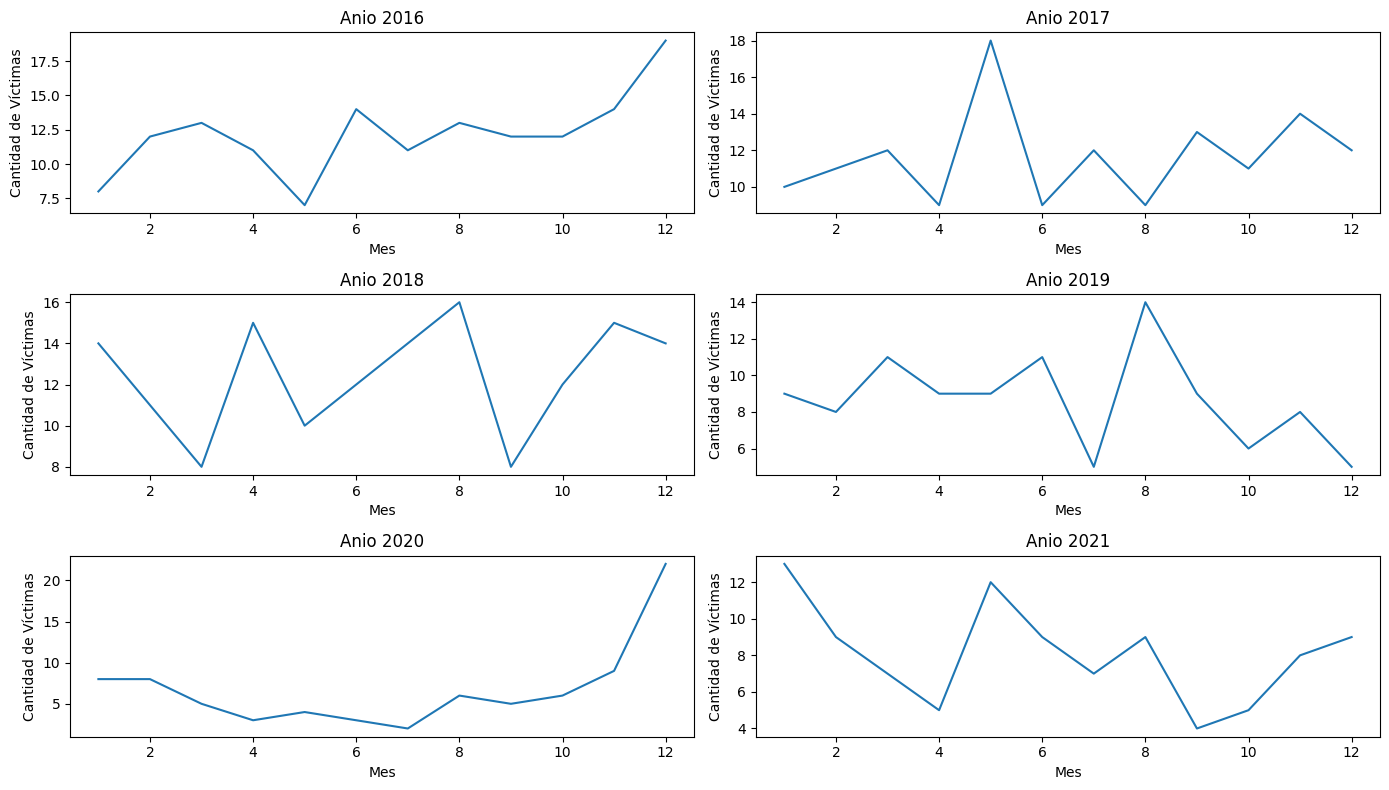

In [45]:
fa.accidentes_mensuales(df_homicidios)

De las gráficas anteriores, no se observa un patrón a lo largo del año comparando entre los distintos años. Los picos de accidentes fatales no se observan en los mismos meses en los distintos años registrados. Lo que se observa con claridad es la disminución notable de accidentes fatales desde Diciembre de 2019 hasta Noviembre de 2020, relacionado con la cuarentena por la pandemia  de COVID-19.

### Cantidad de Victimas por mes del año

El mes con menor cantidad de víctimas tiene 51 víctimas
El mes con mayor cantidad de víctimas tiene 81 víctimas


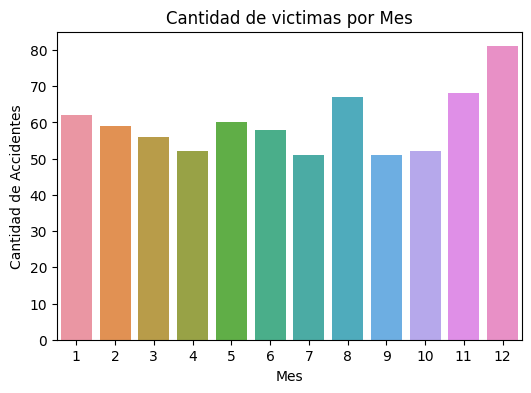

In [46]:
fa.cantidad_victimas_mensuales(df_homicidios)

Si se considera la distribución anual de todos los registros disponibles, se puede observar que el patrón que extiste a lo largo del año es un pico de accidentes en el mes de diciembre, siendo los meses con mas accidentes fatales Diciembre, Noviembre y Agosto. El mes con menos cantidad de accidentes fatales registrados es Julio y Septiembre.

### Cantidad de victimas por dia de la semana

El día de la semana con menor cantidad de víctimas tiene 96 víctimas
El día de la semana con mayor cantidad de víctimas tiene 107 víctimas
La diferencia porcentual es de 11.46


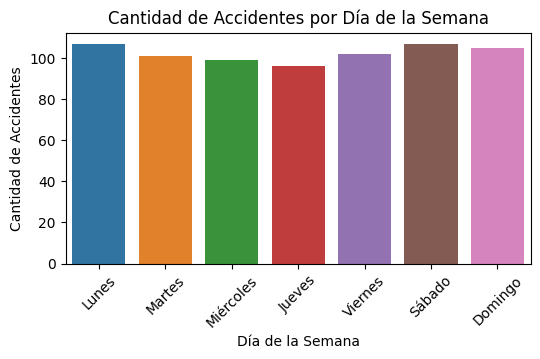

In [47]:
fa.cantidad_victimas_por_dia_semana(df_homicidios)

Considerando el total de los registros, la distribución de los accidentes tienden a registrarse entre los viernes a lunes, con el máximo regritrado el día Sábado y el mínimo el día Jueves. 

### Catidad de accidentes por horario del día

* **Mañana**: de 6:00 a 10:59
* **Medio día**: de 11:00 a 13:59
* **Tarde**: de 14:00 a 18:59
* **Noche**: de 19:00 a 23:59
* **Madrugada**: de 24:00 a 05:59

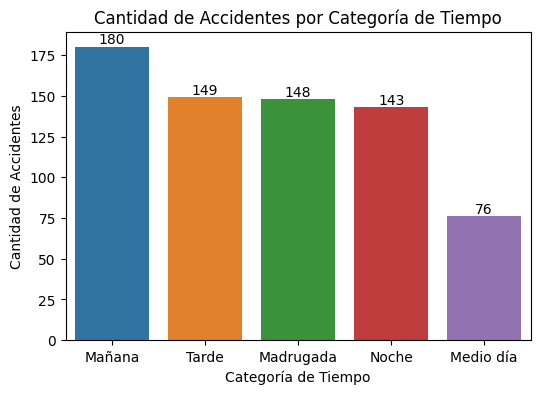

In [48]:
fa.cantidad_accidentes_por_categoria_tiempo(df_homicidios)

Se pueden apreciar que casi el 26% de los accidentes ocurren durante la mañana, donde la actividad laboral es alta. En el mediodía se registra un porcentaje considerablemente menor de cantidad de accidentes fatales respecto a los otros momentos del día.

### Distribución de accidentes por hora del día

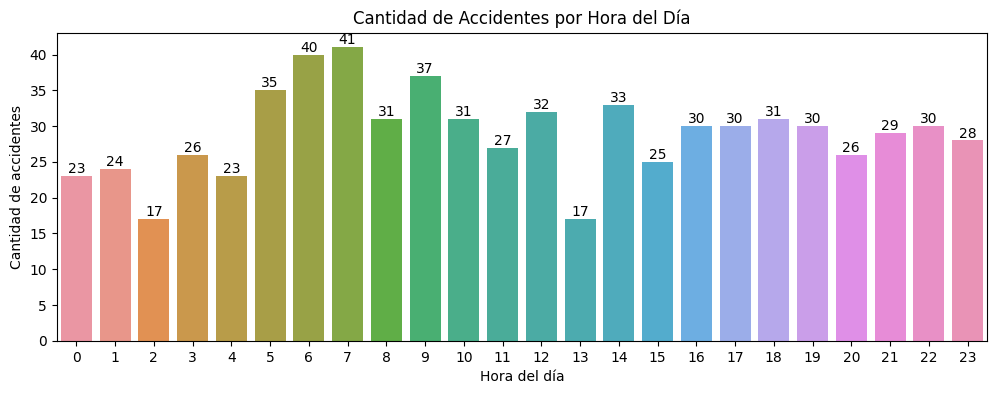

In [49]:
fa.cantidad_accidentes_por_horas_del_dia(df_homicidios)

Ya con más detalle es posible identificar el horario entre las 5 a las 8 de la mañana como el de mayor cantidad de accidentes. Luego se observa un poco a las 9 de la mañana seguido de tres momentos puntuales como lo son las 14 hs, las 18 hs y las 22 hs.

### Distribución de accidentes por tipo de día

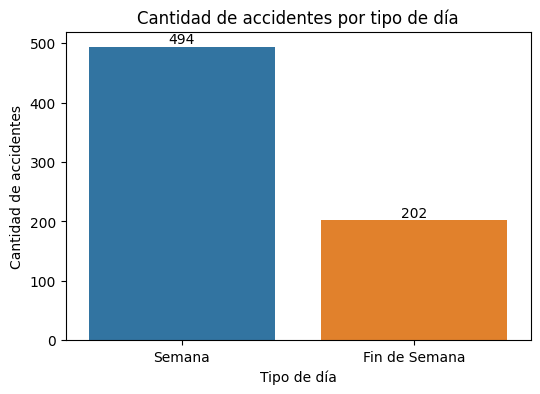

In [50]:
fa.cantidad_accidentes_semana_fin_de_semana(df_homicidios)

Se puede ver que la mayor cantidad de accidentes registrados fue durante la semana, siendo algo menos de la mitad los ocurridos el fin de semana. Pero esto es sólo por sumar los dias de la semana que son 5 y los fines de semna 2. Si se calular el promedio daria valores muy similares, el promedio de los fines de semana sería un poco superior.

### Edad de las víctimas

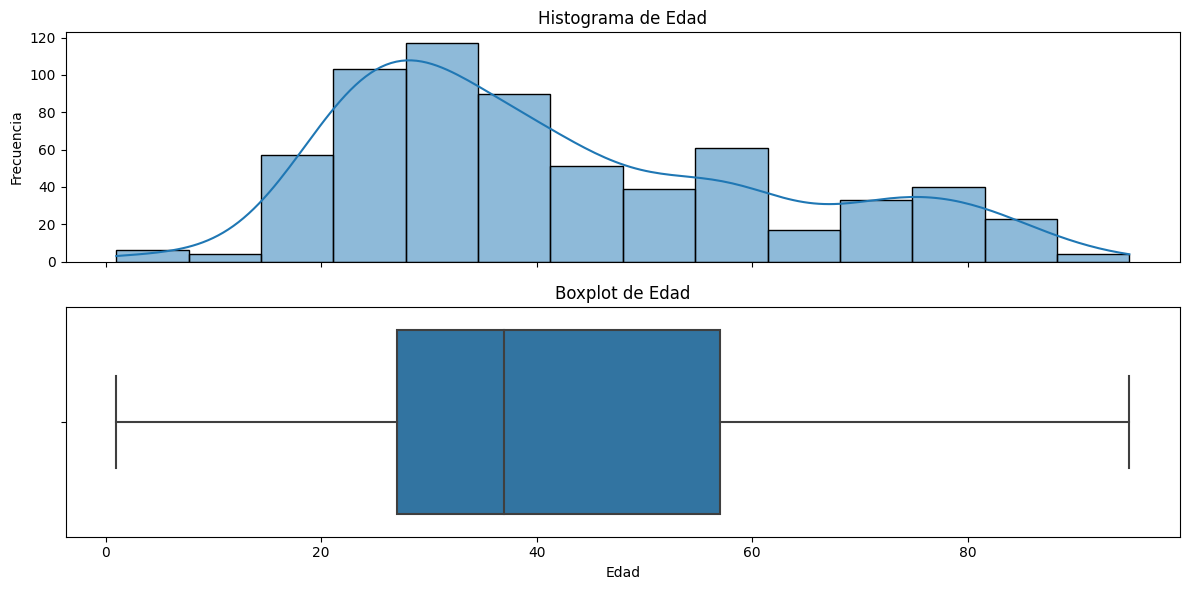

In [51]:
fa.distribucion_edad(df_homicidios)

Se observa una mediana de 39 años. No se observan edades atípicas. Si bien se observa un mínimo de 1 año y un máximo de 95 años, esto tiene que ver con el registro de todas las víctimas, no necesariamente son las que manejaban al momento del accidente. El histograma se observa con una distribución algo sesgada a la derecha, concentrando la mayor cantidad de accidentes entre los 20 a 40 años.

### Boxplot de edades por año

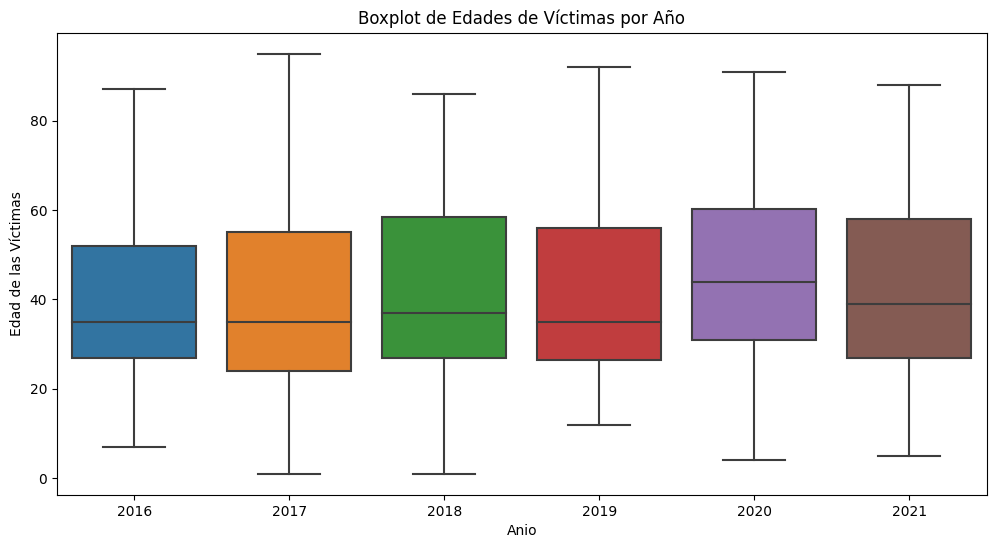

In [52]:
fa.distribucion_edad_por_anio(df_homicidios)

Las distribuciones de las edades se comportan muy parecido en los años registrados, con una mediana cercana a los 40 años

### Cantidad de accidentes por año por sexo

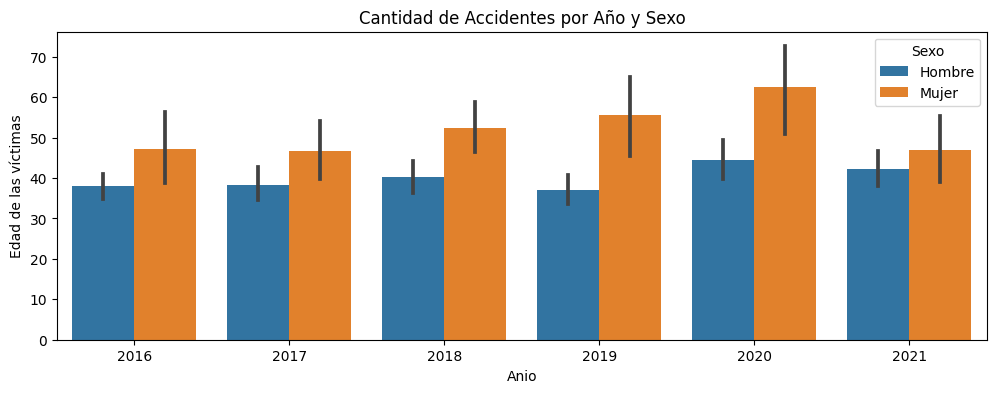

In [53]:
fa.cantidades_accidentes_por_anio_y_sexo(df_homicidios)

In [54]:
resumen_sexo_año = df_homicidios.groupby(['Anio', 'Sexo']).size().reset_index(name='Cantidad accidentes')
resumen_sexo_año

,Anio,Sexo,Cantidad accidentes
0,2016,Hombre,106
1,2016,Mujer,23
2,2017,Hombre,90
3,2017,Mujer,35
4,2018,Hombre,99
5,2018,Mujer,36
6,2019,Hombre,67
7,2019,Mujer,24
8,2020,Hombre,58
9,2020,Mujer,14


En el gráfico anterior se puede ver que hasta el 2021 había una tendencia creciente en las edades de las mujeres fallecidas que en hombres, con edades entre los 40 y 50 años, hasta el año 2020, que se observa una pequeña disminución. En cuanto a los hombres, se observa una leve tendencia al aumento de la edad de fallecimientos pero sostenida alrededor de los 40 años de edad, pero igualmente menor edad que en mujeres.

### Boxplot de rol por edad

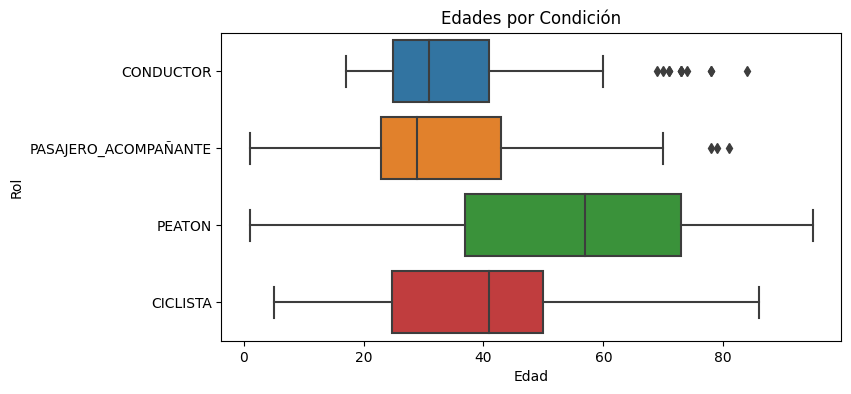

In [55]:
fa.edad_y_rol_victimas(df_homicidios)

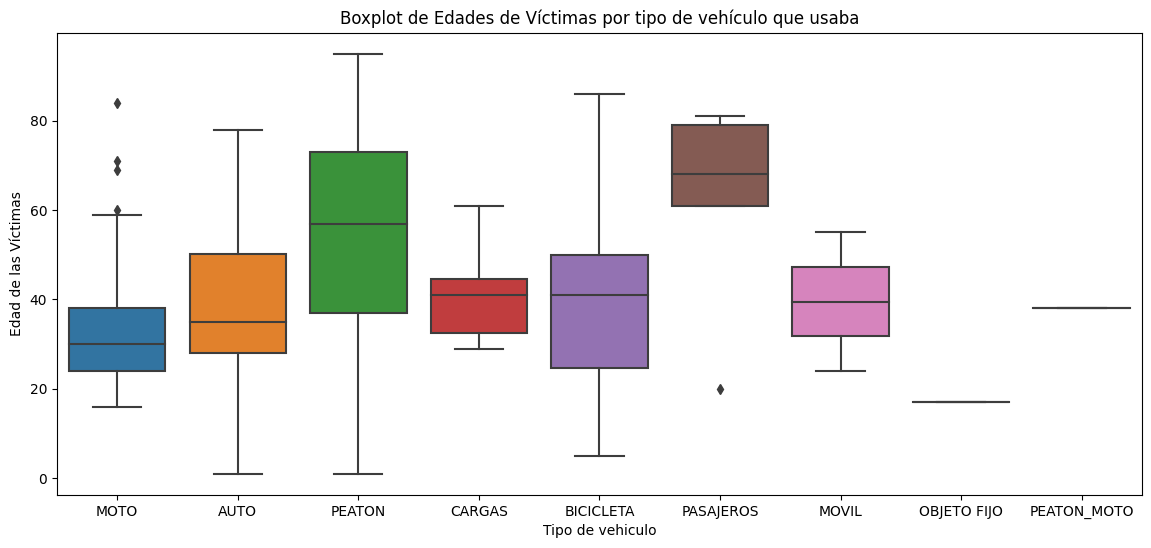

In [56]:
fa.distribucion_edad_por_victima(df_homicidios)

Se observa una gran dispersión de edades de víctimas fallecidas según el vehículo que ocupaban al momento del hecho. En el caso de victimas peatones es donde se observa un rango mas amplio de edades que en las demás categorías. Las victimas de mayor edad se observan mas concentradas cuando son pasajeros y victimas mas joven se observan en moto y objeto fijo.

### Cantidad de víctimas por sexo y rol

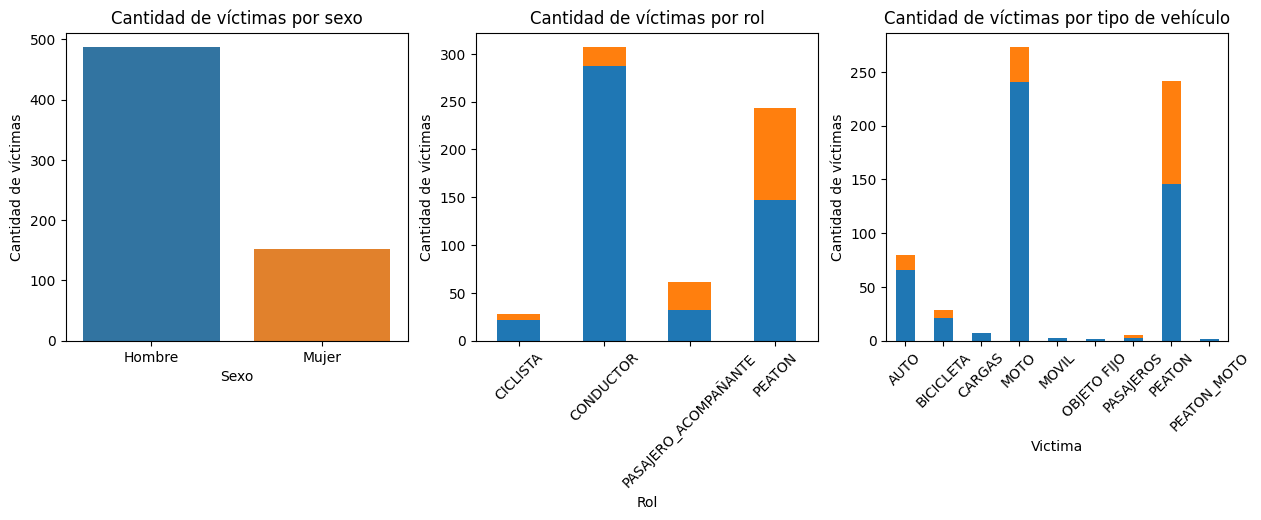

In [57]:
fa.cantidad_victimas_sexo_rol_victima(df_homicidios)

Se puede ver la diferencia en la cantidad de víctimas masculina por sobre las femeninas. Se aprecia la diferencia sobre todo en Conductor, donde la mayor proporción son masculinos y lo que llama la atención es que Motos es el vehículo con mayor proporción de accidentes con una alta proporción de masculinos. Los peatones también son las víctimas con mayor cantidad de fallecimientos en accidentes, con mayor proporción de masculinos, pero menos pronunciada la diferencia.

### Cantidad de víctimas por participante

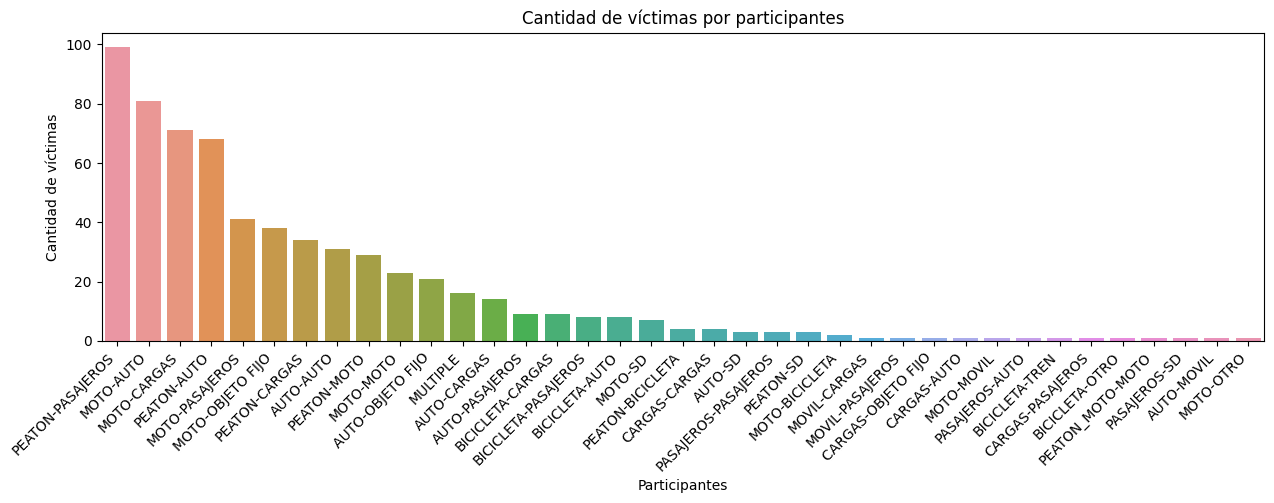

In [58]:
fa.cantidad_victimas_participantes(df_homicidios)

Resulta llamativo que la mayor cantidad de víctimas ocurren por hechos donde se involucran peatones con pasajeros. Según el diccionario de datos, *Peatón* es cualquier víctima distinta de cualquier ocupante de un vehículo, ya sea un conductor/a o un pasajero/a y *Pasajero* es cualquier personas lesionadas que se encuentran dentro, descendiendo o ascendiendo de las unidades de autotrasporte público de pasajeros/as y ómnibus de larga distancia. Para tratar de encontrar un sentido a este punto, se observan los casos de estos registros.

In [59]:
df_homicidios[df_homicidios['Participantes'] == 'PEATON-PASAJEROS'][['Participantes', 'Victima', 'Acusado']]

,Participantes,Victima,Acusado
13,PEATON-PASAJEROS,PEATON,PASAJEROS
21,PEATON-PASAJEROS,PEATON,PASAJEROS
23,PEATON-PASAJEROS,PEATON,PASAJEROS
27,PEATON-PASAJEROS,PEATON,PASAJEROS
34,PEATON-PASAJEROS,PEATON,PASAJEROS
...,...,...,...
679,PEATON-PASAJEROS,PEATON,PASAJEROS
684,PEATON-PASAJEROS,PEATON,PASAJEROS
685,PEATON-PASAJEROS,PEATON,PASAJEROS
705,PEATON-PASAJEROS,PEATON,PASAJEROS


Lo que se interpreta de ver los datos asociados al registro de Participante como Peaton-Pasajero, es que si la víctima es Peatón y el acusado es Pasajero, se debe estar refiriendo que el hecho ocurrió asociado a una persona que subía, bajaba o se trasladaba por algún medio de transporte público. A partir de aquí se considerará de esta manera, pero teniendo en cuenta esta observación hasta confirmar o rechazar por parte de los interesados.

Por otra parte, en el gráfico anterior, se llega a apreciar que los hechos que involucran moto, auto y cargas son los que mayor cantidad de víctimas acumulan.

### Cantidad de acusados en los accidentes

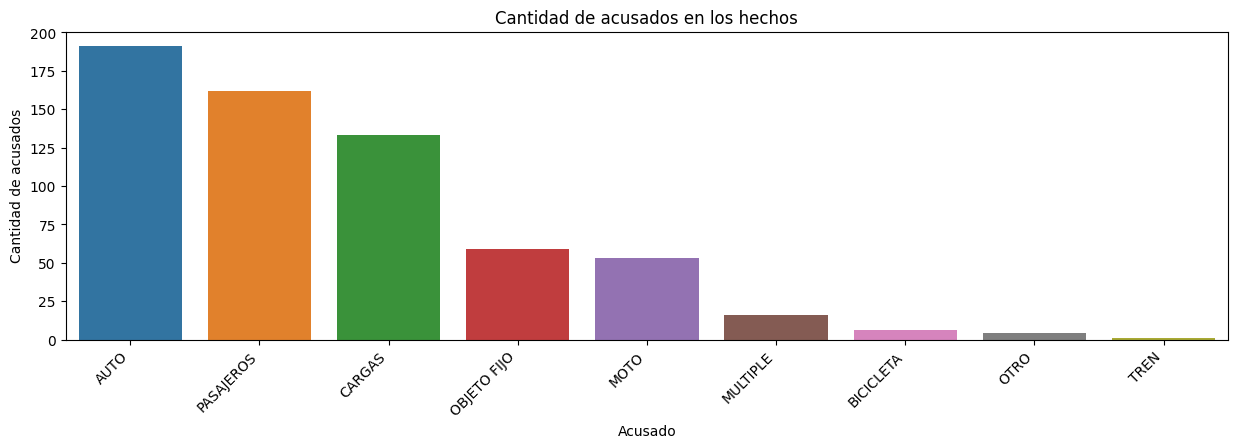

In [60]:
fa.cantidad_acusados(df_homicidios)

Lo que se interpreta de este gráfico es que la mayor responsabilidad en los hechos registrados es de los conductores de autos, seguidas de pasajeros y cargas. En cuanto a Pasajeros tiene sentido en relación con lo interpretado en el punto anterior, donde el vehículo involucrado es el transporte público, lo que da sentido a lo discutido.

### Tipo de calle

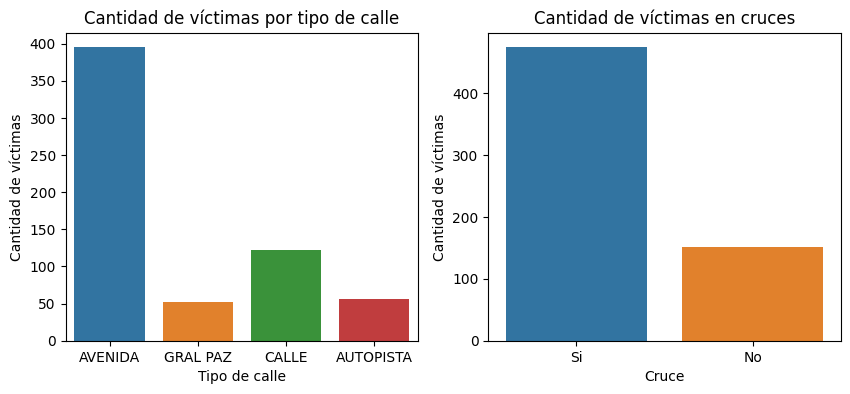

In [61]:
fa.accidentes_tipo_de_calle(df_homicidios)

Se pueden ver que la mayor cantidad de hechos con víctimas fatales ocurren en las avenidas y en particular en los cruces de calles.

In [62]:
#Se guarda al final para que salve algunas modificaciones que se hicieron durante el EDA
df_homicidios.to_csv(os.path.join('dataframe','df1_clean.csv'), index=False)